# Telecom Churn Prediction

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Reading and Understanding

In [2]:
#to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load the dataset
churn_df = pd.read_csv('telecom_churn_data.csv')
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
churn_df.shape

(99999, 226)

In [5]:
# see basic imformation about the dataset
churn_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [6]:
# function for printing columns with their percentage missing values
def print_missing_val_percent_in_cols(df):
    for col in df.columns:
        missing_percent = df[col].isnull().sum() / df.shape[0] * 100
        print('{}: {}'.format(col, round(missing_percent, 2)))
        
# function to return the columns with missing values
def find_missing_val_cols(df):
    missing_val_cols = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            missing_val_cols.append(col)
    return missing_val_cols

In [7]:
# checking the percentage of missing values in the data set
print_missing_val_percent_in_cols(churn_df)

mobile_number: 0.0
circle_id: 0.0
loc_og_t2o_mou: 1.02
std_og_t2o_mou: 1.02
loc_ic_t2o_mou: 1.02
last_date_of_month_6: 0.0
last_date_of_month_7: 0.6
last_date_of_month_8: 1.1
last_date_of_month_9: 1.66
arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
arpu_9: 0.0
onnet_mou_6: 3.94
onnet_mou_7: 3.86
onnet_mou_8: 5.38
onnet_mou_9: 7.75
offnet_mou_6: 3.94
offnet_mou_7: 3.86
offnet_mou_8: 5.38
offnet_mou_9: 7.75
roam_ic_mou_6: 3.94
roam_ic_mou_7: 3.86
roam_ic_mou_8: 5.38
roam_ic_mou_9: 7.75
roam_og_mou_6: 3.94
roam_og_mou_7: 3.86
roam_og_mou_8: 5.38
roam_og_mou_9: 7.75
loc_og_t2t_mou_6: 3.94
loc_og_t2t_mou_7: 3.86
loc_og_t2t_mou_8: 5.38
loc_og_t2t_mou_9: 7.75
loc_og_t2m_mou_6: 3.94
loc_og_t2m_mou_7: 3.86
loc_og_t2m_mou_8: 5.38
loc_og_t2m_mou_9: 7.75
loc_og_t2f_mou_6: 3.94
loc_og_t2f_mou_7: 3.86
loc_og_t2f_mou_8: 5.38
loc_og_t2f_mou_9: 7.75
loc_og_t2c_mou_6: 3.94
loc_og_t2c_mou_7: 3.86
loc_og_t2c_mou_8: 5.38
loc_og_t2c_mou_9: 7.75
loc_og_mou_6: 3.94
loc_og_mou_7: 3.86
loc_og_mou_8: 5.38
loc_og_mou_9: 7.7

In [8]:
missing_val_cols = find_missing_val_cols(churn_df)
print(missing_val_cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t

#### **Business Decision: The missing values for data recharge amount, call recharge amount and avergae recharge amount can be imputed with 0**

In [9]:
churn_df[['total_rech_data_6', 'total_rech_data_7', 
          'total_rech_data_8', 'total_rech_data_9',
          'av_rech_amt_data_6', 'av_rech_amt_data_7',
          'av_rech_amt_data_8', 'av_rech_amt_data_9',
          'total_rech_amt_6', 'total_rech_amt_7',
          'total_rech_amt_8', 'total_rech_amt_9']] = churn_df[['total_rech_data_6', 'total_rech_data_7',
                                                               'total_rech_data_8', 'total_rech_data_9',
                                                               'av_rech_amt_data_6', 'av_rech_amt_data_7',
                                                               'av_rech_amt_data_8', 'av_rech_amt_data_9',
                                                               'total_rech_amt_6', 'total_rech_amt_7',
                                                               'total_rech_amt_8', 'total_rech_amt_9']].fillna(0)

#### Deriving the column that has total data recharge amount for every month

In [10]:
# creating total amount spend on data for each month
churn_df['total_rech_data_amt_6'] = churn_df['total_rech_data_6'] * churn_df['av_rech_amt_data_6']
churn_df['total_rech_data_amt_7'] = churn_df['total_rech_data_7'] * churn_df['av_rech_amt_data_7']
churn_df['total_rech_data_amt_8'] = churn_df['total_rech_data_8'] * churn_df['av_rech_amt_data_8']
churn_df['total_rech_data_amt_9'] = churn_df['total_rech_data_9'] * churn_df['av_rech_amt_data_9']

In [11]:
churn_df.shape

(99999, 230)

#### Deriving the columns that has the total recharge amount for calling plus data included for every month

In [12]:
# creating total amound spend every month including calls and data
churn_df['total_rech_call_plus_data_6'] = churn_df['total_rech_amt_6'] + churn_df['total_rech_data_amt_6']
churn_df['total_rech_call_plus_data_7'] = churn_df['total_rech_amt_7'] + churn_df['total_rech_data_amt_7']
churn_df['total_rech_call_plus_data_8'] = churn_df['total_rech_amt_8'] + churn_df['total_rech_data_amt_8']
churn_df['total_rech_call_plus_data_9'] = churn_df['total_rech_amt_9'] + churn_df['total_rech_data_amt_9']

#### **NOTE: We have assumed that average data usage amount also includes value based services amount**

<!-- #### Deriving the totol amount spend per month -->

In [13]:
# # calculating total spend including total recharge plus amount spend on value-based services
# churn_df['total_spend_6'] = churn_df['total_rech_call_plus_data_6'] + churn_df['jun_vbc_3g']
# churn_df['total_spend_7'] = churn_df['total_rech_call_plus_data_7'] + churn_df['jul_vbc_3g']
# churn_df['total_spend_8'] = churn_df['total_rech_call_plus_data_8'] + churn_df['aug_vbc_3g']
# churn_df['total_spend_9'] = churn_df['total_rech_call_plus_data_9'] + churn_df['sep_vbc_3g']

#### **Business Logic: Finding the average amount of total recharge of call plus data for the good phase i.e. the months 6 and 7**

In [14]:
# creating average amount spend on call plus data in good phase
churn_df['total_rech_call_plus_data_good_phase'] = (churn_df['total_rech_call_plus_data_6'] + churn_df['total_rech_call_plus_data_7']) / 2

#### **Business Decision: Only the customers that have average recharge amount more than 70 percentile during the good phase (i.e months 6 and 7) are considered for the churn prediction as according to the businees logic these are the customers that account for 80% of the total revenue**

In [15]:
# computing the 70% quantile recharge amount
high_value_cust_rech_amt = churn_df['total_rech_call_plus_data_good_phase'].quantile(0.7)
print(high_value_cust_rech_amt)

478.0


#### Observation: The threshold recharge amount for deciding a customer as high value comes out to be Rs 478 per month during the good phase

In [16]:
# finding the high value customers
churn_df = churn_df[churn_df['total_rech_call_plus_data_good_phase'] > high_value_cust_rech_amt]
churn_df.shape

(29953, 235)

#### NOTE: The data set that contains only the high value customers has roughly 29.9k records

### Calculating the Churn label for the month of September

In [17]:
# finding the usage-based churn for month 9
#finding the total call and data usage for month 9
churn_df['total_call_data_usage_9'] = churn_df['total_ic_mou_9'] + churn_df['total_og_mou_9'] + churn_df['vol_2g_mb_9'] + churn_df['vol_3g_mb_9']

# finding the Churn label on usage
churn_df['Churn'] = (churn_df['total_call_data_usage_9'] > 0).map({True: 0, False: 1})

In [18]:
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_9,total_rech_call_plus_data_good_phase,total_call_data_usage_9,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0

**Renaming the jun_vbc_3g and other columns to have month number a suffix for maintaining naming consistency**

In [19]:
# renaminga the columns to have month number as suffix
churn_df.rename(columns={'jun_vbc_3g': 'jun_vbc_3g_6', 'jul_vbc_3g': 'jul_vbc_3g_7', 'aug_vbc_3g': 'aug_vbc_3g_8', 'sep_vbc_3g': 'sep_vbc_3g_9'}, inplace=True)

In [20]:
# function to return columns of the dataframe containing string x
def get_cols(df, x):
    x_cols = []
    for col in df.columns:
        if x in col:
            x_cols.append(col)
    return x_cols

#### Dropping the columns with month 9 data as it won't  be available at the time of prediction

In [21]:
# dropping month 9 columns
churn_df.drop(get_cols(churn_df, '_9'), axis=1, inplace=True)

In [22]:
churn_df.shape

(29953, 179)

### Exploring the object columns

In [23]:
object_data_type_cols = churn_df.select_dtypes('object')
object_data_type_cols

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014
...,...,...,...,...,...,...,...,...,...
99981,6/30/2014,7/31/2014,8/31/2014,6/17/2014,7/25/2014,8/27/2014,6/17/2014,7/14/2014,8/23/2014
99984,6/30/2014,7/31/2014,8/31/2014,6/21/2014,7/31/2014,8/27/2014,6/15/2014,7/31/2014,8/27/2014
99986,6/30/2014,7/31/2014,8/31/2014,6/20/2014,7/28/2014,8/18/2014,6/17/2014,7/18/2014,8/14/2014
99988,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/28/2014,8/29/2014,NaN,7/26/2014,8/23/2014


**Observation: All the object data type columns are dates**

In [24]:
# converting the object type columns to datetime
for col in object_data_type_cols:
    churn_df[col] = churn_df[col].apply(pd.to_datetime)

In [25]:
churn_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1
7,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.2

**Object data type columns are converted to datetime type**

#### Deriving the number of days since last recharge column

Imputing the missing values in last date of month before deriving new columns

In [26]:
# imputing the missing values
churn_df['last_date_of_month_7'].fillna(churn_df['last_date_of_month_7'].mode()[0], inplace=True)
churn_df['last_date_of_month_8'].fillna(churn_df['last_date_of_month_8'].mode()[0], inplace=True)

In [27]:
# finding the number of days since last call recharge for every month
churn_df['num_of_days_last_rech_6'] = (churn_df['last_date_of_month_6'] - churn_df['date_of_last_rech_6']).dt.days
churn_df['num_of_days_last_rech_7'] = (churn_df['last_date_of_month_7'] - churn_df['date_of_last_rech_7']).dt.days
churn_df['num_of_days_last_rech_8'] = (churn_df['last_date_of_month_8'] - churn_df['date_of_last_rech_8']).dt.days

# finding the number of days since last data recharge for every month
churn_df['num_of_days_last_rech_data_6'] = (churn_df['last_date_of_month_6'] - churn_df['date_of_last_rech_data_6']).dt.days
churn_df['num_of_days_last_rech_data_7'] = (churn_df['last_date_of_month_7'] - churn_df['date_of_last_rech_data_7']).dt.days
churn_df['num_of_days_last_rech_data_8'] = (churn_df['last_date_of_month_8'] - churn_df['date_of_last_rech_data_8']).dt.days

print(churn_df.shape)
churn_df.head()

(29953, 185)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn,num_of_days_last_rech_6,num_of_days_last_rech_7,num_of_days_last_rech_8,num_of_days_last_rech_data_6,num_of_days_last_rech_data_7,num_of_days_last_rech_data_8
0,7000842753,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,9.0,15.0,23.0,9.0,15.0,23.0
7,7000701601,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.1

#### **Dropping the date columns as we have derived new columns using that information and it is no longer useful**

In [28]:
# dropping the last date of month and last day of recharge for call and data columns for the months
churn_df.drop(list(object_data_type_cols), axis=1, inplace=True)
churn_df.shape

(29953, 176)

## Data Cleaning and Preprocessing

#### **We need to prepare the data in a way that months 6 and 7 are combined into good phase data and month 8 as action phase. We are doing this to give the model input this way.**

In [29]:
churn_df['circle_id'].value_counts()

109    29953
Name: circle_id, dtype: int64

**We can drop circle_id as it has the same value for all columns**

In [30]:
churn_df.drop('circle_id', axis=1, inplace=True)

In [31]:
churn_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn,num_of_days_last_rech_6,num_of_days_last_rech_7,num_of_days_last_rech_8,num_of_days_last_rech_data_6,num_of_days_last_rech_data_7,num_of_days_last_rech_data_8
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,9.0,15.0,23.0,9.0,15.0,23.0
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,17

In [32]:
churn_df['loc_og_t2o_mou'].value_counts()

0.0    29730
Name: loc_og_t2o_mou, dtype: int64

In [33]:
churn_df['std_og_t2o_mou'].value_counts()

0.0    29730
Name: std_og_t2o_mou, dtype: int64

In [34]:
churn_df['loc_ic_t2o_mou'].value_counts()

0.0    29730
Name: loc_ic_t2o_mou, dtype: int64

**Dropping the columns loc_ic_t2o_mou, std_og_t2o_mou and loc_og_t2o_mou as they have all the values as 0**

In [35]:
churn_df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis=1, inplace=True)

In [36]:
# checking again the percentage of null values in each column
print_missing_val_percent_in_cols(churn_df)

mobile_number: 0.0
arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 1.81
onnet_mou_7: 1.79
onnet_mou_8: 3.91
offnet_mou_6: 1.81
offnet_mou_7: 1.79
offnet_mou_8: 3.91
roam_ic_mou_6: 1.81
roam_ic_mou_7: 1.79
roam_ic_mou_8: 3.91
roam_og_mou_6: 1.81
roam_og_mou_7: 1.79
roam_og_mou_8: 3.91
loc_og_t2t_mou_6: 1.81
loc_og_t2t_mou_7: 1.79
loc_og_t2t_mou_8: 3.91
loc_og_t2m_mou_6: 1.81
loc_og_t2m_mou_7: 1.79
loc_og_t2m_mou_8: 3.91
loc_og_t2f_mou_6: 1.81
loc_og_t2f_mou_7: 1.79
loc_og_t2f_mou_8: 3.91
loc_og_t2c_mou_6: 1.81
loc_og_t2c_mou_7: 1.79
loc_og_t2c_mou_8: 3.91
loc_og_mou_6: 1.81
loc_og_mou_7: 1.79
loc_og_mou_8: 3.91
std_og_t2t_mou_6: 1.81
std_og_t2t_mou_7: 1.79
std_og_t2t_mou_8: 3.91
std_og_t2m_mou_6: 1.81
std_og_t2m_mou_7: 1.79
std_og_t2m_mou_8: 3.91
std_og_t2f_mou_6: 1.81
std_og_t2f_mou_7: 1.79
std_og_t2f_mou_8: 3.91
std_og_t2c_mou_6: 1.81
std_og_t2c_mou_7: 1.79
std_og_t2c_mou_8: 3.91
std_og_mou_6: 1.81
std_og_mou_7: 1.79
std_og_mou_8: 3.91
isd_og_mou_6: 1.81
isd_og_mou_7: 1.79
isd_og_mou

In [37]:
# columns which have only one value
cols_with_one_value = churn_df.columns[churn_df.nunique() <= 1].to_list()
churn_df.drop(cols_with_one_value, axis=1, inplace=True)

#### **Checking amount and number of recharge data for month 6**

In [38]:
price_cols = ['arpu_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6', 'total_rech_data_amt_6', 'total_rech_call_plus_data_6', 'num_of_days_last_rech_6', 'num_of_days_last_rech_data_6', 'jun_vbc_3g_6',]
churn_df[price_cols].head(10)

,arpu_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,total_rech_data_amt_6,total_rech_call_plus_data_6,num_of_days_last_rech_6,num_of_days_last_rech_data_6,jun_vbc_3g_6
0,197.385,4,362,252,252,1.0,252.0,0.0,1.0,252.0,212.17,212.17,0.0,0,0,1,0,1.0,252.0,614.0,9.0,9.0,101.20
7,1069.180,5,1580,1580,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,1580.0,3.0,NaN,18.74
8,378.721,19,437,90,50,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,437.0,5.0,NaN,122.16
21,514.453,22,600,50,30,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,600.0,0.0,NaN,0.00
23,74.350,3,0,0,0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,0.0,12.0,NaN,0.00
33,977.020,7,1058,252,252,5.0,252.0,0.0,5.0,1057.0,897.60,931.58,1.0,0,0,4,1,1.0,5285.0,6343.0,0.0,0.0,1714.67
38,363.987,27,420,30,20,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,420.0,0.0,NaN,0.00
41,482.832,4,496,150,150,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,496.0,6.0,NaN,0.00
48,1873.271,13,2317,250,250,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,NaN,0.0,2317.0,1.0,NaN,0.00
53,978.077,24,1159,120,0,4.0,23.0,4.0,0.0,86.0,0.00,12.00,0.0,0,4,0,0,1.0,344.0,1503.0,1.0,1.0,0.00


In [39]:
churn_df['Churn'].value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [40]:
# dropping mobile number column as it has no significance for modelling
churn_df.drop('mobile_number', axis=1, inplace=True)

In [41]:
churn_df.shape

(29953, 165)

In [42]:
print_missing_val_percent_in_cols(churn_df)

arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 1.81
onnet_mou_7: 1.79
onnet_mou_8: 3.91
offnet_mou_6: 1.81
offnet_mou_7: 1.79
offnet_mou_8: 3.91
roam_ic_mou_6: 1.81
roam_ic_mou_7: 1.79
roam_ic_mou_8: 3.91
roam_og_mou_6: 1.81
roam_og_mou_7: 1.79
roam_og_mou_8: 3.91
loc_og_t2t_mou_6: 1.81
loc_og_t2t_mou_7: 1.79
loc_og_t2t_mou_8: 3.91
loc_og_t2m_mou_6: 1.81
loc_og_t2m_mou_7: 1.79
loc_og_t2m_mou_8: 3.91
loc_og_t2f_mou_6: 1.81
loc_og_t2f_mou_7: 1.79
loc_og_t2f_mou_8: 3.91
loc_og_t2c_mou_6: 1.81
loc_og_t2c_mou_7: 1.79
loc_og_t2c_mou_8: 3.91
loc_og_mou_6: 1.81
loc_og_mou_7: 1.79
loc_og_mou_8: 3.91
std_og_t2t_mou_6: 1.81
std_og_t2t_mou_7: 1.79
std_og_t2t_mou_8: 3.91
std_og_t2m_mou_6: 1.81
std_og_t2m_mou_7: 1.79
std_og_t2m_mou_8: 3.91
std_og_t2f_mou_6: 1.81
std_og_t2f_mou_7: 1.79
std_og_t2f_mou_8: 3.91
std_og_mou_6: 1.81
std_og_mou_7: 1.79
std_og_mou_8: 3.91
isd_og_mou_6: 1.81
isd_og_mou_7: 1.79
isd_og_mou_8: 3.91
spl_og_mou_6: 1.81
spl_og_mou_7: 1.79
spl_og_mou_8: 3.91
og_others_6: 1.81
og_o

In [43]:
churn_df[get_cols(churn_df, '_6')]

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_call_plus_data_6,num_of_days_last_rech_6,num_of_days_last_rech_data_6
0,197.385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,4,362,252,252,1.0,252.0,0.0,1.0,252.0,30.13,83.57,212.17,212.17,0.0,0,0,1,0,1.0,101.20,252.0,614.0,9.0,9.0
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,62.13,0.00,422.16,4.30,49.89,6.66,60.86,0.0,4.50,0.00,487.53,58.14,217.56,152.16,427.88,36.89,91.44,52.19,180.54,626.46,0.21,2.06,15.74,5,1580,1580,0,0.0,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,18.74,0.0,1580.0,3.0,NaN
8,378.721,413.69,94.66,0.00,0.00,297.13,80.96,0.00,0.00,378.09,116.56,13.69,0.00,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00,0.00,19,437,90,50,0.0,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,122.16,0.0,437.0,5.0,NaN
21,514.453,102.41,757.93,0.00,0.00,4.48,91.81,0.75,0.00,97.04,97.93,665.36,0.00,763.29,0.0,0.00,0.00,860.34,2.48,118.23,4.61,125.33,14.06,67.69,0.00,81.76,207.09,0.00,0.00,0.00,22,600,50,30,0.0,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00,0.0,600.0,0.0,NaN
23,74.350,48.96,85.41,0.00,0.00,48.96,82.94,0.00,0.00,131.91,0.00,2.36,0.00,2.36,0.0,0.10,0.00,134.38,20.71,95.91,0.00,116.63,0.51,2.43,0.00,2.94,119.58,0.00,0.00,0.00,3,0,0,0,0.0,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00,0.0,0.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,384.316,78.68,56.13,0.00,0.00,72.53,52.21,0.00,3.91,124.74,6.15,0.00,0.00,6.15,0.0,3.91,0.00,134.81,285.33,93.36,0.30,378.99,57.60,0.00,41.59,99.19,478.48,0.13,0.00,0.15,2,252,252,252,1.0,252.0,0.0,1.0,252.0,54.81,692.72,212.18,212.17,0.0,0,0,1,0,1.0,668.05,252.0,504.0,13.0,13.0
99984,328.594,423.99,39.51,0.00,0.00,423.99,17.96,0.00,17.04,441.96,0.00,0.03,0.00,0.03,0.0,21.51,1.06,464.58,32.21,53.49,0.00,85.71,0.00,2.33,0.99,3.33,89.48,0.43,0.00,0.00,8,360,154,0,1.0,154.0,1.0,0.0,154.0,1248.50,0.00,0.00,0.02,0.0,1,0,0,0,1.0,0.00,154.0,514.0,9.0,15.0
99986,644.973,806.73,784.76,0.00,0.00,709.21,574.93,16.28,15.96,1300.43,97.51,186.88,0.00,284.39,0.0,15.96,0.00,1600.79,140.71,395.58,29.96,566.26,2.31,12.14,0.00,14.46,580.73,0.00,0.00,0.00,6,567,550,550,1.0,17.0,1.0,0.0,17.0,34.28,736.01,0.88,0.00,0.0,0,1,0,0,1.0,604.08,17.0,584.0,10.0,13.0
99988,312.558,199.89,175.88,0.00,0.00,170.28,137.83,0.00,0.00,308.11,29.61,38.04,0.00,67.66,0.0,0.00,0.00,375.78,47.56,245.31,14.43,307.31,10.08,680.34,1.01,691.44,998.96,0.00,0.00,0.20,12,380,50,50,0.0,NaN,NaN,NaN,0.0,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,0.00,0.0,380.0,0.0,NaN


In [44]:
og_cols_6 = get_cols(churn_df[get_cols(churn_df, '_6')], 'og')
og_cols_6

['roam_og_mou_6',
 'loc_og_t2t_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'loc_og_mou_6',
 'std_og_t2t_mou_6',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_mou_6',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'og_others_6',
 'total_og_mou_6']

In [45]:
churn_df[churn_df['total_og_mou_6'] == 0][og_cols_6].fillna(0).isnull().sum()

roam_og_mou_6       0
loc_og_t2t_mou_6    0
loc_og_t2m_mou_6    0
loc_og_t2f_mou_6    0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
og_others_6         0
total_og_mou_6      0
dtype: int64

In [46]:
og_cols_7 = get_cols(churn_df[get_cols(churn_df, '_7')], 'og')
print(og_cols_7)
churn_df[churn_df['total_og_mou_7'] == 0][og_cols_7].fillna(0).isnull().sum()

['roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7']


roam_og_mou_7       0
loc_og_t2t_mou_7    0
loc_og_t2m_mou_7    0
loc_og_t2f_mou_7    0
loc_og_t2c_mou_7    0
loc_og_mou_7        0
std_og_t2t_mou_7    0
std_og_t2m_mou_7    0
std_og_t2f_mou_7    0
std_og_mou_7        0
isd_og_mou_7        0
spl_og_mou_7        0
og_others_7         0
total_og_mou_7      0
dtype: int64

In [47]:
og_cols_8 = get_cols(churn_df[get_cols(churn_df, '_8')], 'og')
print(og_cols_8)
churn_df[churn_df['total_og_mou_8'] == 0][og_cols_8].fillna(0).isnull().sum()

['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']


roam_og_mou_8       0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_8    0
loc_og_mou_8        0
std_og_t2t_mou_8    0
std_og_t2m_mou_8    0
std_og_t2f_mou_8    0
std_og_mou_8        0
isd_og_mou_8        0
spl_og_mou_8        0
og_others_8         0
total_og_mou_8      0
dtype: int64

**Observation: The above observation proves that records whichever records have total outgoing mous as 0 are the only ones that have NaN in their og mou columns**

#### **Therefore, imputing all the NaN og mou columns with 0**

In [48]:
# imputing the missing values
churn_df.loc[churn_df['total_og_mou_6'] == 0, og_cols_6] = churn_df[churn_df['total_og_mou_6'] == 0][og_cols_6].fillna(0)
churn_df.loc[churn_df['total_og_mou_7'] == 0, og_cols_7] = churn_df[churn_df['total_og_mou_7'] == 0][og_cols_7].fillna(0)
churn_df.loc[churn_df['total_og_mou_8'] == 0, og_cols_8] = churn_df[churn_df['total_og_mou_8'] == 0][og_cols_8].fillna(0)

In [49]:
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn,num_of_days_last_rech_6,num_of_days_last_rech_7,num_of_days_last_rech_8,num_of_days_last_rech_data_6,num_of_days_last_rech_data_7,num_of_days_last_rech_data_8
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,9.0,15.0,23.0,9.0,15.0,23.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN

In [51]:
ic_cols_6 = get_cols(churn_df[get_cols(churn_df, '_6')], 'ic')
print(ic_cols_6)
churn_df[churn_df['total_ic_mou_6'] == 0][ic_cols_6].fillna(0).isnull().sum()

['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']


roam_ic_mou_6       0
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2m_mou_6    0
std_ic_t2f_mou_6    0
std_ic_mou_6        0
total_ic_mou_6      0
spl_ic_mou_6        0
isd_ic_mou_6        0
ic_others_6         0
dtype: int64

In [52]:
ic_cols_7 = get_cols(churn_df[get_cols(churn_df, '_7')], 'ic')
print(ic_cols_7)
churn_df[churn_df['total_ic_mou_7'] == 0][ic_cols_7].fillna(0).isnull().sum()

['roam_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7', 'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']


roam_ic_mou_7       0
loc_ic_t2t_mou_7    0
loc_ic_t2m_mou_7    0
loc_ic_t2f_mou_7    0
loc_ic_mou_7        0
std_ic_t2t_mou_7    0
std_ic_t2m_mou_7    0
std_ic_t2f_mou_7    0
std_ic_mou_7        0
total_ic_mou_7      0
spl_ic_mou_7        0
isd_ic_mou_7        0
ic_others_7         0
dtype: int64

In [53]:
ic_cols_8 = get_cols(churn_df[get_cols(churn_df, '_8')], 'ic')
print(ic_cols_8)
churn_df[churn_df['total_ic_mou_8'] == 0][ic_cols_8].fillna(0).isnull().sum()

['roam_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']


roam_ic_mou_8       0
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_8    0
loc_ic_mou_8        0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_8    0
std_ic_mou_8        0
total_ic_mou_8      0
spl_ic_mou_8        0
isd_ic_mou_8        0
ic_others_8         0
dtype: int64

**Observation: The above observation proves that records whichever records have total incoming mous as 0 are the only ones that have NaN in their ic mou columns**

#### **Therefore, imputing all the NaN ic mou columns with 0**

In [54]:
# imputing the missing values
churn_df.loc[churn_df['total_ic_mou_6'] == 0, ic_cols_6] = churn_df[churn_df['total_ic_mou_6'] == 0][ic_cols_6].fillna(0)
churn_df.loc[churn_df['total_ic_mou_7'] == 0, ic_cols_7] = churn_df[churn_df['total_ic_mou_7'] == 0][ic_cols_7].fillna(0)
churn_df.loc[churn_df['total_ic_mou_8'] == 0, ic_cols_8] = churn_df[churn_df['total_ic_mou_8'] == 0][ic_cols_8].fillna(0)

In [55]:
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn,num_of_days_last_rech_6,num_of_days_last_rech_7,num_of_days_last_rech_8,num_of_days_last_rech_data_6,num_of_days_last_rech_data_7,num_of_days_last_rech_data_8
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,9.0,15.0,23.0,9.0,15.0,23.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,

In [66]:
onnet_offnet_cols_6 = get_cols(churn_df[get_cols(churn_df, '_6')], 'net')
print(onnet_offnet_cols_6)
churn_df[(churn_df['total_og_mou_6'] == 0) & (churn_df['total_ic_mou_6'] == 0)][onnet_offnet_cols_6].fillna(0).isnull().sum()

['onnet_mou_6', 'offnet_mou_6']


onnet_mou_6     0
offnet_mou_6    0
dtype: int64

In [67]:
onnet_offnet_cols_7 = get_cols(churn_df[get_cols(churn_df, '_7')], 'net')
print(onnet_offnet_cols_7)
churn_df[(churn_df['total_og_mou_7'] == 0) & (churn_df['total_ic_mou_7'] == 0)][onnet_offnet_cols_7].fillna(0).isnull().sum()

['onnet_mou_7', 'offnet_mou_7']


onnet_mou_7     0
offnet_mou_7    0
dtype: int64

In [68]:
onnet_offnet_cols_8 = get_cols(churn_df[get_cols(churn_df, '_8')], 'net')
print(onnet_offnet_cols_8)
churn_df[(churn_df['total_og_mou_8'] == 0) & (churn_df['total_ic_mou_8'] == 0)][onnet_offnet_cols_8].fillna(0).isnull().sum()

['onnet_mou_8', 'offnet_mou_8']


onnet_mou_8     0
offnet_mou_8    0
dtype: int64

**Observation: The above observation proves that records whichever records have total incoming mous and total outgoing mous as 0 are the only ones that have NaN in their onnet and offnet mou columns**

#### **Therefore, imputing all the NaN onnnet and offnet columns with 0**

In [69]:
# imputing the missing values
churn_df.loc[(churn_df['total_og_mou_6'] == 0) & (churn_df['total_ic_mou_6'] == 0), onnet_offnet_cols_6] = churn_df[(churn_df['total_og_mou_6'] == 0) & (churn_df['total_ic_mou_6'] == 0)][onnet_offnet_cols_6].fillna(0)
churn_df.loc[(churn_df['total_og_mou_7'] == 0) & (churn_df['total_ic_mou_7'] == 0), onnet_offnet_cols_7] = churn_df[(churn_df['total_og_mou_7'] == 0) & (churn_df['total_ic_mou_7'] == 0)][onnet_offnet_cols_7].fillna(0)
churn_df.loc[(churn_df['total_og_mou_8'] == 0) & (churn_df['total_ic_mou_8'] == 0), onnet_offnet_cols_8] = churn_df[(churn_df['total_og_mou_8'] == 0) & (churn_df['total_ic_mou_8'] == 0)][onnet_offnet_cols_8].fillna(0)

In [70]:
churn_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn,num_of_days_last_rech_6,num_of_days_last_rech_7,num_of_days_last_rech_8,num_of_days_last_rech_data_6,num_of_days_last_rech_data_7,num_of_days_last_rech_data_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,9.0,15.0,23.0,9.0,15.0,23.0
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0

In [71]:
print_missing_val_percent_in_cols(churn_df)

arpu_6: 0.0
arpu_7: 0.0
arpu_8: 0.0
onnet_mou_6: 0.0
onnet_mou_7: 0.0
onnet_mou_8: 0.0
offnet_mou_6: 0.0
offnet_mou_7: 0.0
offnet_mou_8: 0.0
roam_ic_mou_6: 0.0
roam_ic_mou_7: 0.0
roam_ic_mou_8: 0.0
roam_og_mou_6: 0.0
roam_og_mou_7: 0.0
roam_og_mou_8: 0.0
loc_og_t2t_mou_6: 0.0
loc_og_t2t_mou_7: 0.0
loc_og_t2t_mou_8: 0.0
loc_og_t2m_mou_6: 0.0
loc_og_t2m_mou_7: 0.0
loc_og_t2m_mou_8: 0.0
loc_og_t2f_mou_6: 0.0
loc_og_t2f_mou_7: 0.0
loc_og_t2f_mou_8: 0.0
loc_og_t2c_mou_6: 0.0
loc_og_t2c_mou_7: 0.0
loc_og_t2c_mou_8: 0.0
loc_og_mou_6: 0.0
loc_og_mou_7: 0.0
loc_og_mou_8: 0.0
std_og_t2t_mou_6: 0.0
std_og_t2t_mou_7: 0.0
std_og_t2t_mou_8: 0.0
std_og_t2m_mou_6: 0.0
std_og_t2m_mou_7: 0.0
std_og_t2m_mou_8: 0.0
std_og_t2f_mou_6: 0.0
std_og_t2f_mou_7: 0.0
std_og_t2f_mou_8: 0.0
std_og_mou_6: 0.0
std_og_mou_7: 0.0
std_og_mou_8: 0.0
isd_og_mou_6: 0.0
isd_og_mou_7: 0.0
isd_og_mou_8: 0.0
spl_og_mou_6: 0.0
spl_og_mou_7: 0.0
spl_og_mou_8: 0.0
og_others_6: 0.0
og_others_7: 0.0
og_others_8: 0.0
total_og_mou_6: 

In [125]:
def get_data_missing_cols(df):
    data_missing_cols = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if 'num_of_days' not in col:
                data_missing_cols.append(col)
            print(col, round(df[col].isnull().sum() / len(df) * 100, 2))
    return data_missing_cols

In [126]:
data_missing_cols = get_data_missing_cols(churn_df)

max_rech_data_6 44.11
max_rech_data_7 43.12
max_rech_data_8 46.8
count_rech_2g_6 44.11
count_rech_2g_7 43.12
count_rech_2g_8 46.8
count_rech_3g_6 44.11
count_rech_3g_7 43.12
count_rech_3g_8 46.8
arpu_3g_6 44.11
arpu_3g_7 43.12
arpu_3g_8 46.8
arpu_2g_6 44.11
arpu_2g_7 43.12
arpu_2g_8 46.8
fb_user_6 44.11
fb_user_7 43.12
fb_user_8 46.8
num_of_days_last_rech_6 0.24
num_of_days_last_rech_7 0.33
num_of_days_last_rech_8 1.94
num_of_days_last_rech_data_6 44.11
num_of_days_last_rech_data_7 43.12
num_of_days_last_rech_data_8 46.8


In [85]:
churn_df[get_cols(churn_df[find_missing_val_cols], '_6')]

,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,fb_user_6,num_of_days_last_rech_6,num_of_days_last_rech_data_6
0,252.0,0.0,1.0,212.17,212.17,0.0,1.0,9.0,9.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN
...,...,...,...,...,...,...,...,...,...
99981,252.0,0.0,1.0,212.18,212.17,0.0,1.0,13.0,13.0
99984,154.0,1.0,0.0,0.00,0.02,0.0,1.0,9.0,15.0
99986,17.0,1.0,0.0,0.88,0.00,0.0,1.0,10.0,13.0
99988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


<AxesSubplot:xlabel='num_of_days_last_rech_data_6'>

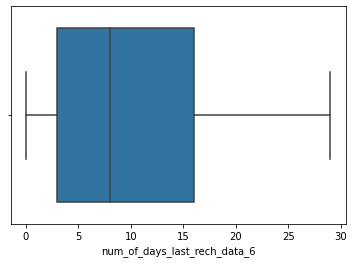

In [86]:
sns.boxplot(x='num_of_days_last_rech_data_6', data=churn_df)

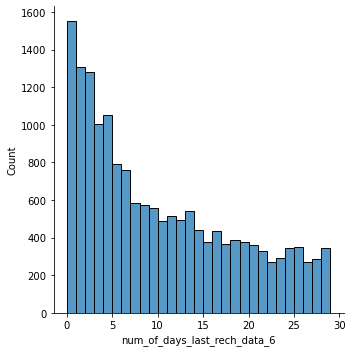

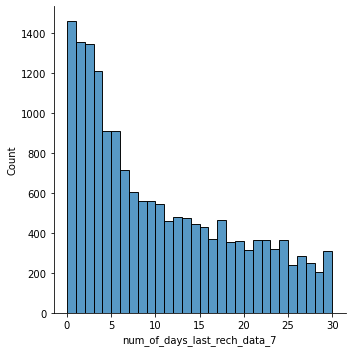

In [104]:
sns.displot(data=churn_df, x='num_of_days_last_rech_data_6', kind='hist')
sns.displot(data=churn_df, x='num_of_days_last_rech_data_7', kind='hist')

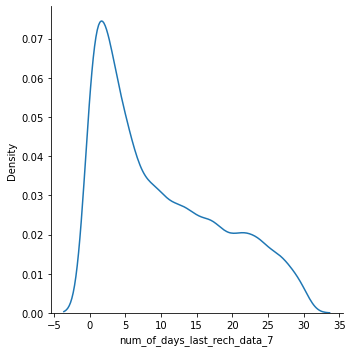

In [89]:
sns.displot(data=churn_df, x='num_of_days_last_rech_data_7', kind='kde')

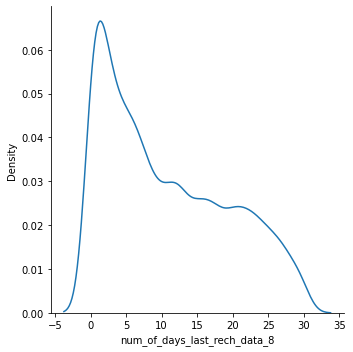

In [90]:
sns.displot(data=churn_df, x='num_of_days_last_rech_data_8', kind='kde')

In [105]:
churn_df[churn_df['num_of_days_last_rech_data_6'].isnull() & churn_df['num_of_days_last_rech_data_7'].isnull()]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g_8,jul_vbc_3g_7,jun_vbc_3g_6,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_call_plus_data_6,total_rech_call_plus_data_7,total_rech_call_plus_data_8,total_rech_call_plus_data_good_phase,Churn,num_of_days_last_rech_6,num_of_days_last_rech_7,num_of_days_last_rech_8,num_of_days_last_rech_data_6,num_of_days_last_rech_data_7,num_of_days_last_rech_data_8
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,3.0,6.0,5.0,NaN,NaN,NaN
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0

In [111]:
churn_df['night_pck_user_6'].value_counts(normalize=True)*100

0.0    97.568698
1.0     2.431302
Name: night_pck_user_6, dtype: float64

In [112]:
churn_df['night_pck_user_6'].fillna(0).value_counts(normalize=True)*100

0.0    98.641205
1.0     1.358795
Name: night_pck_user_6, dtype: float64

In [113]:
churn_df['night_pck_user_7'].value_counts(normalize=True)*100

0.0    97.799037
1.0     2.200963
Name: night_pck_user_7, dtype: float64

In [114]:
churn_df['night_pck_user_7'].fillna(0).value_counts(normalize=True)*100

0.0    98.748039
1.0     1.251961
Name: night_pck_user_7, dtype: float64

In [116]:
churn_df['night_pck_user_8'].value_counts(normalize=True)*100

0.0    97.860056
1.0     2.139944
Name: night_pck_user_8, dtype: float64

In [115]:
churn_df['night_pck_user_8'].fillna(0).value_counts(normalize=True)*100

0.0    98.86155
1.0     1.13845
Name: night_pck_user_8, dtype: float64

#### **Since almost 97.5% users do not avail night scheme and imputing the missing values with 0 makes only a difference of 1% in the distribution of the column, so we impute it with 0**

In [117]:
# imputing missing values with 0
churn_df['night_pck_user_6'].fillna(0, inplace=True)
churn_df['night_pck_user_7'].fillna(0, inplace=True)
churn_df['night_pck_user_8'].fillna(0, inplace=True)

**Exploring fb_user column**

In [118]:
churn_df['fb_user_6'].value_counts(normalize=True)*100

1.0    92.658303
0.0     7.341697
Name: fb_user_6, dtype: float64

In [122]:
churn_df['fb_user_6'].fillna(1).value_counts(normalize=True)*100

1.0    95.896905
0.0     4.103095
Name: fb_user_6, dtype: float64

In [119]:
churn_df['fb_user_7'].value_counts(normalize=True)*100

1.0    92.176312
0.0     7.823688
Name: fb_user_7, dtype: float64

In [128]:
churn_df['fb_user_7'].fillna(1).value_counts(normalize=True)*100

1.0    95.549695
0.0     4.450305
Name: fb_user_7, dtype: float64

In [120]:
churn_df['fb_user_8'].value_counts(normalize=True)*100

1.0    89.720741
0.0    10.279259
Name: fb_user_8, dtype: float64

In [130]:
churn_df['fb_user_8'].fillna(1).value_counts(normalize=True)*100

1.0    94.531433
0.0     5.468567
Name: fb_user_8, dtype: float64

#### **Since almost 90% users do avail fb services scheme and imputing the missing values with 1 makes only a difference of 3% in the distribution of the column, so we impute it with 1**

In [131]:
# imputing missing values with 1
churn_df['fb_user_6'].fillna(1, inplace=True)
churn_df['fb_user_7'].fillna(1, inplace=True)
churn_df['fb_user_8'].fillna(1, inplace=True)

In [133]:
data_missing_cols = get_data_missing_cols(churn_df)

max_rech_data_6 44.11
max_rech_data_7 43.12
max_rech_data_8 46.8
count_rech_2g_6 44.11
count_rech_2g_7 43.12
count_rech_2g_8 46.8
count_rech_3g_6 44.11
count_rech_3g_7 43.12
count_rech_3g_8 46.8
arpu_3g_6 44.11
arpu_3g_7 43.12
arpu_3g_8 46.8
arpu_2g_6 44.11
arpu_2g_7 43.12
arpu_2g_8 46.8
num_of_days_last_rech_6 0.24
num_of_days_last_rech_7 0.33
num_of_days_last_rech_8 1.94
num_of_days_last_rech_data_6 44.11
num_of_days_last_rech_data_7 43.12
num_of_days_last_rech_data_8 46.8


In [135]:
churn_df[churn_df['total_rech_data_6'] == 0][data_missing_cols]

,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,0.00,19.83,NaN,0.00,0.00
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,179.0,179.0,NaN,0.0,0.0,NaN,2.0,2.0,NaN,306.57,197.27,NaN,301.78,150.67
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99963,NaN,17.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,27.70,NaN
99965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Observation: On exploring all the data related columns, we have found that columns that have their their total_rech_data_amt as 0 have all their other data related columns value as NaN, so we will impute these with 0 as it makes sense that customers who have not recharged data will have other data usage columns as 0**

In [138]:
data_missing_cols_6 = get_cols(churn_df[data_missing_cols], '_6')
print(data_missing_cols_6)
churn_df.loc[churn_df['total_rech_data_amt_6'] == 0, data_missing_cols_6] = churn_df[churn_df['total_rech_data_amt_6'] == 0][data_missing_cols_6].fillna(0)

['max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'arpu_3g_6', 'arpu_2g_6']


In [139]:
data_missing_cols_7 = get_cols(churn_df[data_missing_cols], '_7')
print(data_missing_cols_7)
churn_df.loc[churn_df['total_rech_data_amt_7'] == 0, data_missing_cols_7] = churn_df[churn_df['total_rech_data_amt_7'] == 0][data_missing_cols_7].fillna(0)

['max_rech_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 'arpu_2g_7']


In [140]:
data_missing_cols_8 = get_cols(churn_df[data_missing_cols], '_8')
print(data_missing_cols_8)
churn_df.loc[churn_df['total_rech_data_amt_8'] == 0, data_missing_cols_8] = churn_df[churn_df['total_rech_data_amt_8'] == 0][data_missing_cols_8].fillna(0)

['max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'arpu_3g_8', 'arpu_2g_8']


In [141]:
find_missing_val_cols(churn_df)

['num_of_days_last_rech_6',
 'num_of_days_last_rech_7',
 'num_of_days_last_rech_8',
 'num_of_days_last_rech_data_6',
 'num_of_days_last_rech_data_7',
 'num_of_days_last_rech_data_8']